# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib
from sklearn.linear_model import LinearRegression
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build API Call URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url;

In [4]:
# Print Introduction
print("Begin Data Retrieval         ")
print("-----------------------------")

# Create empty list to hold city data
city_data = []

# Create counters
records = 1
sets = 1

# Loop through all the cities in our list
for i, city in enumerate(cities,1):
        
# Group cities 
    if (i % 50 == 0 and i >= 50):
        sets += 1
        records = 0

# Create City URL 
    city_url = query_url + urllib.request.pathname2url(city)

# Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (records, sets, city))
    print(city_url)

# Add 1 to the record count
    records += 1

# Run an API request for each of the cities
    try:
        
# Retrieve the Data
        city_weather = requests.get(city_url).json()

# Get Data Stats
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

# Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("End Data Retrieval           ")

Begin Data Retrieval         
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=hithadhoo
Processing Record 2 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=mataura
Processing Record 3 of Set 1 | tabou
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=tabou
Processing Record 4 of Set 1 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=chokurdakh
Processing Record 5 of Set 1 | sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=sao%20felix%20do%20xingu
Processing Record 6 of Set 1 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=cidreira
Processing Recor

Processing Record 5 of Set 2 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=fortuna
Processing Record 6 of Set 2 | albany
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=albany
Processing Record 7 of Set 2 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=attawapiskat
City not found...
Processing Record 8 of Set 2 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=chuy
Processing Record 9 of Set 2 | kailua
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=kailua
Processing Record 10 of Set 2 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=sitka
Processing Record 11 of Set 2 | beloha
http://api.openweathermap.org/data/2.5/weather?appid=26e92

Processing Record 8 of Set 3 | terrace bay
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=terrace%20bay
Processing Record 9 of Set 3 | peterhead
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=peterhead
Processing Record 10 of Set 3 | ancud
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=ancud
Processing Record 11 of Set 3 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=cabo%20san%20lucas
Processing Record 12 of Set 3 | mayor pablo lagerenza
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=mayor%20pablo%20lagerenza
Processing Record 13 of Set 3 | lebu
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=lebu
Processing Record 14 of Set 3 | coihaique
http://api.o

Processing Record 12 of Set 4 | rabnita
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=rabnita
City not found...
Processing Record 13 of Set 4 | apaseo el alto
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=apaseo%20el%20alto
Processing Record 14 of Set 4 | nemuro
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=nemuro
Processing Record 15 of Set 4 | kendari
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=kendari
Processing Record 16 of Set 4 | ayagoz
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=ayagoz
Processing Record 17 of Set 4 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=georgetown
Processing Record 18 of Set 4 | vaini
http://api.openweathermap.org/

Processing Record 17 of Set 5 | tinaquillo
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=tinaquillo
Processing Record 18 of Set 5 | laguna
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=laguna
Processing Record 19 of Set 5 | vao
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=vao
Processing Record 20 of Set 5 | podor
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=podor
Processing Record 21 of Set 5 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=ponta%20do%20sol
Processing Record 22 of Set 5 | medea
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=medea
Processing Record 23 of Set 5 | vanavara
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe861

Processing Record 21 of Set 6 | moyale
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=moyale
Processing Record 22 of Set 6 | sungaipenuh
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=sungaipenuh
Processing Record 23 of Set 6 | riberalta
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=riberalta
Processing Record 24 of Set 6 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=saskylakh
Processing Record 25 of Set 6 | knysna
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=knysna
Processing Record 26 of Set 6 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=sao%20joao%20da%20barra
Processing Record 27 of Set 6 | sao jose da coroa grande
http://api.

Processing Record 25 of Set 7 | salt
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=salt
Processing Record 26 of Set 7 | la spezia
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=la%20spezia
Processing Record 27 of Set 7 | pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=pacific%20grove
Processing Record 28 of Set 7 | airai
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=airai
Processing Record 29 of Set 7 | nyagan
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=nyagan
Processing Record 30 of Set 7 | filadelfia
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=filadelfia
Processing Record 31 of Set 7 | hailey
http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record 30 of Set 8 | duldurga
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=duldurga
Processing Record 31 of Set 8 | aksu
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=aksu
Processing Record 32 of Set 8 | richards bay
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=richards%20bay
Processing Record 33 of Set 8 | kuito
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=kuito
Processing Record 34 of Set 8 | methoni
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=methoni
Processing Record 35 of Set 8 | kamina
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=kamina
Processing Record 36 of Set 8 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe

Processing Record 34 of Set 9 | haimen
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=haimen
Processing Record 35 of Set 9 | cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=cherskiy
Processing Record 36 of Set 9 | srbac
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=srbac
Processing Record 37 of Set 9 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=mandalgovi
Processing Record 38 of Set 9 | solovetskiy
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=solovetskiy
City not found...
Processing Record 39 of Set 9 | rabat
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=rabat
Processing Record 40 of Set 9 | kamenka
http://api.openweathermap.org/data/2.5/wea

Processing Record 38 of Set 10 | albion
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=albion
Processing Record 39 of Set 10 | hundorp
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=hundorp
Processing Record 40 of Set 10 | paradwip
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=paradwip
City not found...
Processing Record 41 of Set 10 | margate
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=margate
Processing Record 42 of Set 10 | vrangel
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=vrangel
Processing Record 43 of Set 10 | nador
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=nador
Processing Record 44 of Set 10 | emerald
http://api.openweathermap.org/data/2.5/weathe

Processing Record 42 of Set 11 | bandeirantes
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=bandeirantes
Processing Record 43 of Set 11 | beyneu
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=beyneu
Processing Record 44 of Set 11 | sudak
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=sudak
Processing Record 45 of Set 11 | havre de grace
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=havre%20de%20grace
Processing Record 46 of Set 11 | republic
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=republic
Processing Record 47 of Set 11 | alyangula
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=alyangula
Processing Record 48 of Set 11 | bengkulu
http://api.openweathermap.org/

Processing Record 47 of Set 12 | bagotville
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=bagotville
Processing Record 48 of Set 12 | tiradentes
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=tiradentes
Processing Record 49 of Set 12 | nosy varika
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=nosy%20varika
Processing Record 0 of Set 13 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=vila%20franca%20do%20campo
Processing Record 1 of Set 13 | oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=oktyabrskoye
Processing Record 2 of Set 13 | kijang
http://api.openweathermap.org/data/2.5/weather?appid=26e92fe86124830b2754b183a619aa1d&units=metric&q=kijang
Processing Record 3 of Set 13 | carlsbad


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create Data Frame
weather_data_pd = pd.DataFrame(city_data)

# Create CSV
weather_data_pd.to_csv("WeatherPy.csv",encoding="utf-8",index=False)

# Display Data
weather_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,29.09,62,14,3.81,MV,1614909527
1,mataura,-46.1927,168.8643,14.73,65,100,2.17,NZ,1614909529
2,tabou,4.4230,-7.3528,25.87,88,99,3.72,CI,1614909529
3,chokurdakh,70.6333,147.9167,-22.72,90,100,9.97,RU,1614909464
4,sao felix do xingu,-6.6447,-51.9950,22.19,95,96,1.32,BR,1614909530


In [6]:
# Look for empty rows
weather_data_pd.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [7]:
# Find Cities with Humidity over 100
humidity_df = weather_data_pd.loc[(weather_data_pd["Humidity"] > 100)]
humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
weather_data_df = weather_data_pd.loc[(weather_data_pd["Humidity"] < 100)]

# Sort Humidity Values
weather_data_df.sort_values('Humidity', ascending = False, inplace = True)
weather_data_df

<ipython-input-8-f91c1341a874>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_df.sort_values('Humidity', ascending = False, inplace = True)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
180,pinhao,-25.6956,-51.6597,17.63,99,100,1.87,BR,1614909424
115,vostok,46.4856,135.8833,-0.40,99,100,6.49,RU,1614909399
42,puerto ayora,-0.7393,-90.3518,24.44,98,84,1.95,EC,1614909562
145,ayagoz,47.9714,80.4392,-3.24,98,100,9.62,KZ,1614909650
221,severnoye,56.3491,78.3619,-3.98,98,100,7.32,RU,1614909704
...,...,...,...,...,...,...,...,...,...
471,saint-louis,16.3333,-15.0000,23.92,18,29,4.55,SN,1614909918
463,yulara,-25.2406,130.9889,31.00,11,8,7.72,AU,1614909912
346,midland,31.9974,-102.0779,21.00,10,1,7.72,US,1614909600
38,mount isa,-20.7333,139.5000,33.00,9,0,4.12,AU,1614909287


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

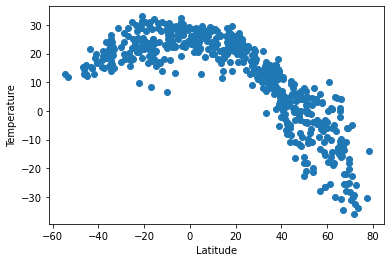

In [9]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

## Latitude vs. Humidity Plot

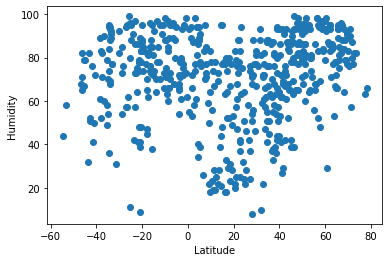

In [10]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

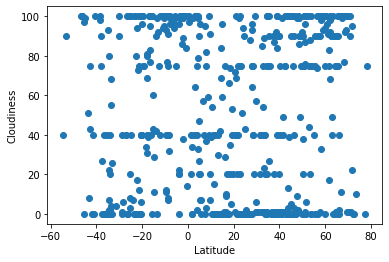

In [11]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

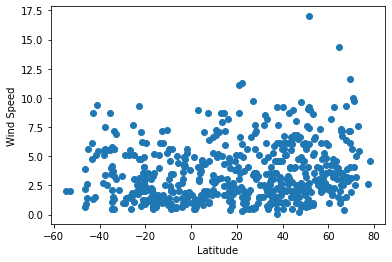

In [12]:
plt.scatter(weather_data_df['Lat'],weather_data_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

## Linear Regression

In [13]:
# Separate cities in Northern and Southern Hemispheres
northern = weather_data_df.loc[weather_data_df['Lat'] >= 0]
southern = weather_data_df.loc[weather_data_df['Lat'] < 0]

In [14]:
# Print Northern Data Frame
northern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
115,vostok,46.4856,135.8833,-0.40,99,100,6.49,RU,1614909399
145,ayagoz,47.9714,80.4392,-3.24,98,100,9.62,KZ,1614909650
221,severnoye,56.3491,78.3619,-3.98,98,100,7.32,RU,1614909704
275,ozernovskiy,51.5000,156.5167,-0.44,98,100,9.25,RU,1614909742
133,camopi,3.1655,-52.3158,22.30,98,100,1.06,GF,1614909641
...,...,...,...,...,...,...,...,...,...
390,yuli,9.6989,10.2744,24.15,18,7,3.42,NG,1614909850
196,podor,16.6527,-14.9587,24.12,18,9,4.87,MR,1614909685
471,saint-louis,16.3333,-15.0000,23.92,18,29,4.55,SN,1614909918
346,midland,31.9974,-102.0779,21.00,10,1,7.72,US,1614909600


In [15]:
# Print Southern Data Frame
southern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
180,pinhao,-25.6956,-51.6597,17.63,99,100,1.87,BR,1614909424
42,puerto ayora,-0.7393,-90.3518,24.44,98,84,1.95,EC,1614909562
355,alta floresta,-9.8756,-56.0861,21.94,98,100,1.43,BR,1614909811
496,bandeirantes,-23.1100,-50.3675,20.52,97,100,1.75,BR,1614909944
433,kabompo,-13.5927,24.2008,16.96,97,99,1.26,ZM,1614909881
...,...,...,...,...,...,...,...,...,...
102,san rafael,-34.6177,-68.3301,26.56,36,0,2.13,AR,1614909337
553,christchurch,-43.5333,172.6333,21.67,32,51,6.17,NZ,1614909971
362,san juan,-31.5375,-68.5364,28.73,31,4,2.12,AR,1614909602
463,yulara,-25.2406,130.9889,31.00,11,8,7.72,AU,1614909912


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
lat = northern.iloc[:,1]
temp = northern.iloc[:,3]
correlation = st.pearsonr(lat,temp)
print(f"The correlation between latitude and temperature in the Northern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and temperature in the Northern Hemisphere is -0.89


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
lat = southern.iloc[:,1]
temp = southern.iloc[:,3]
correlation = st.pearsonr(lat,temp)
print(f"The correlation between latitude and temperature in the Southern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and temperature in the Southern Hemisphere is 0.54


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [18]:
lat = northern.iloc[:,1]
hum = northern.iloc[:,4]
correlation = st.pearsonr(lat,hum)
print(f"The correlation between latitude and humidity in the Northern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and humidity in the Northern Hemisphere is 0.36


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [19]:
lat = southern.iloc[:,1]
hum = southern.iloc[:,4]
correlation = st.pearsonr(lat,hum)
print(f"The correlation between latitude and humidity in the Southern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and humidity in the Southern Hemisphere is 0.21


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [20]:
lat = northern.iloc[:,1]
cld = northern.iloc[:,5]
correlation = st.pearsonr(lat,cld)
print(f"The correlation between latitude and cloudiness in the Northern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and cloudiness in the Northern Hemisphere is 0.21


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [21]:
lat = southern.iloc[:,1]
cld = southern.iloc[:,5]
correlation = st.pearsonr(lat,cld)
print(f"The correlation between latitude and cloudiness in the Southern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and cloudiness in the Southern Hemisphere is 0.26


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [22]:
lat = northern.iloc[:,1]
wind = northern.iloc[:,6]
correlation = st.pearsonr(lat,wind)
print(f"The correlation between latitude and wind speed in the Northern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and wind speed in the Northern Hemisphere is 0.16


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [23]:
lat = southern.iloc[:,1]
wind = southern.iloc[:,6]
correlation = st.pearsonr(lat,wind)
print(f"The correlation between latitude and wind speed in the Southern Hemisphere is {round(correlation[0],2)}")

The correlation between latitude and wind speed in the Southern Hemisphere is -0.19
